# Healthcare Insurance Expenses

## Getting Started

### Requirements
* Anaconda - On Windows OS install and add to root path. 
* Python 3
* VS Code (Optional)
* Necessary Libraries (numpy, pandas, matplotlib, seaborn, Scikit Learn)

### Import Libraries

In [3]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data cleaning

In [11]:
# Checking for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Checking for duplicated values

data.duplicated().sum()

1

In [13]:
# Dropping any duplicated values

data.drop_duplicates(inplace=True)

In [14]:
# Checking if there are any duplicate values

data.duplicated().sum()

0

In [15]:
# Checking our data

data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis
### Univariate Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\2115336833.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


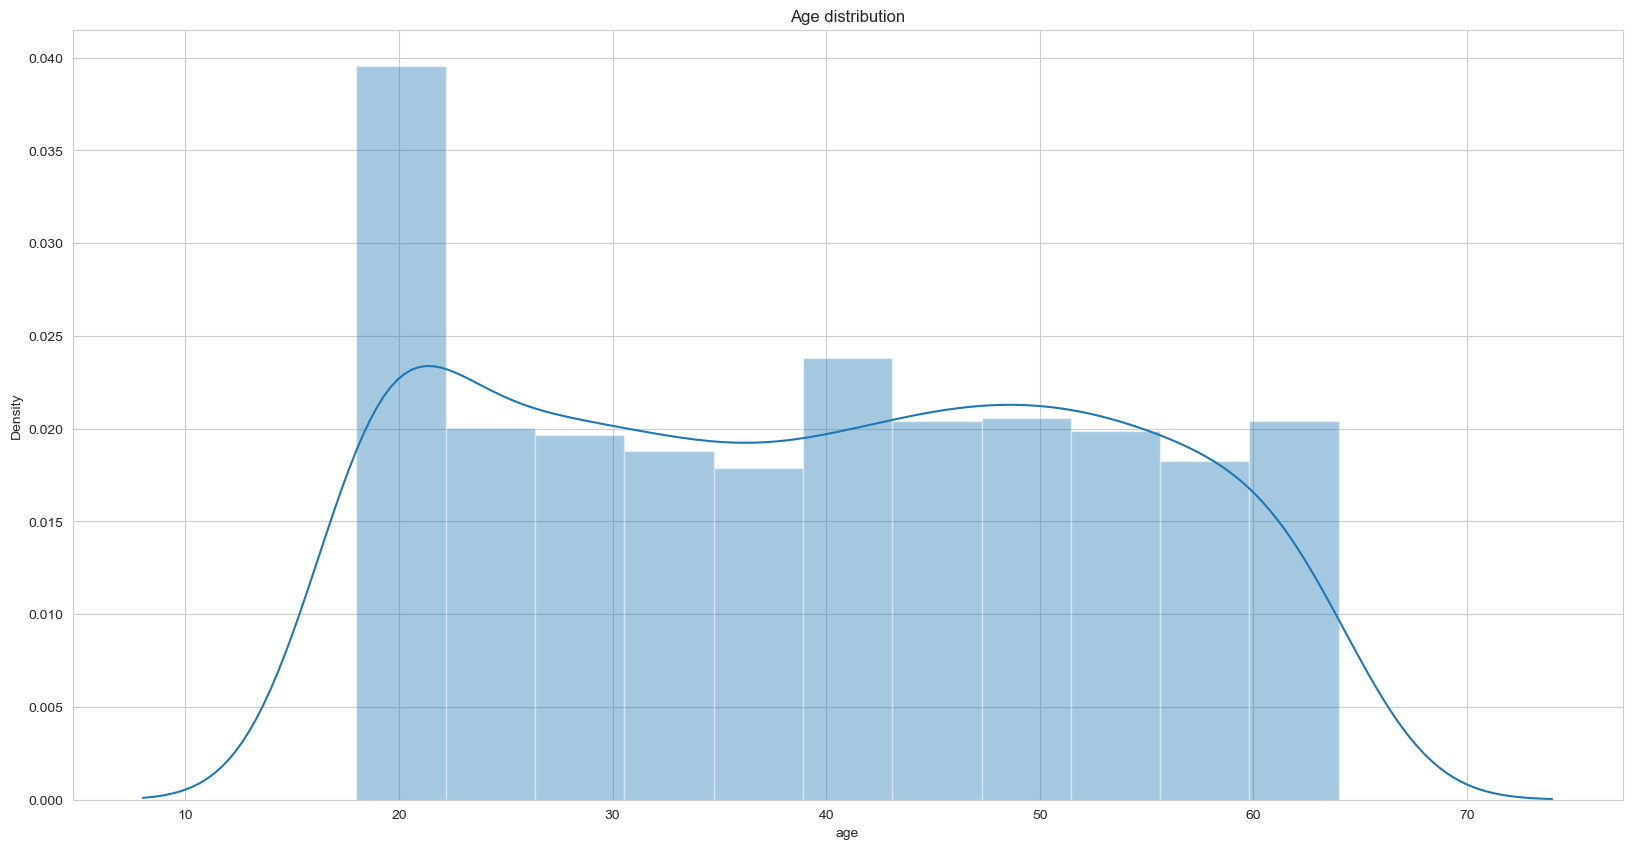

In [23]:
# Using graphs to show the distribution of age and bmi

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.distplot(data['age'])

plt.title("Age distribution")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\3697768169.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)


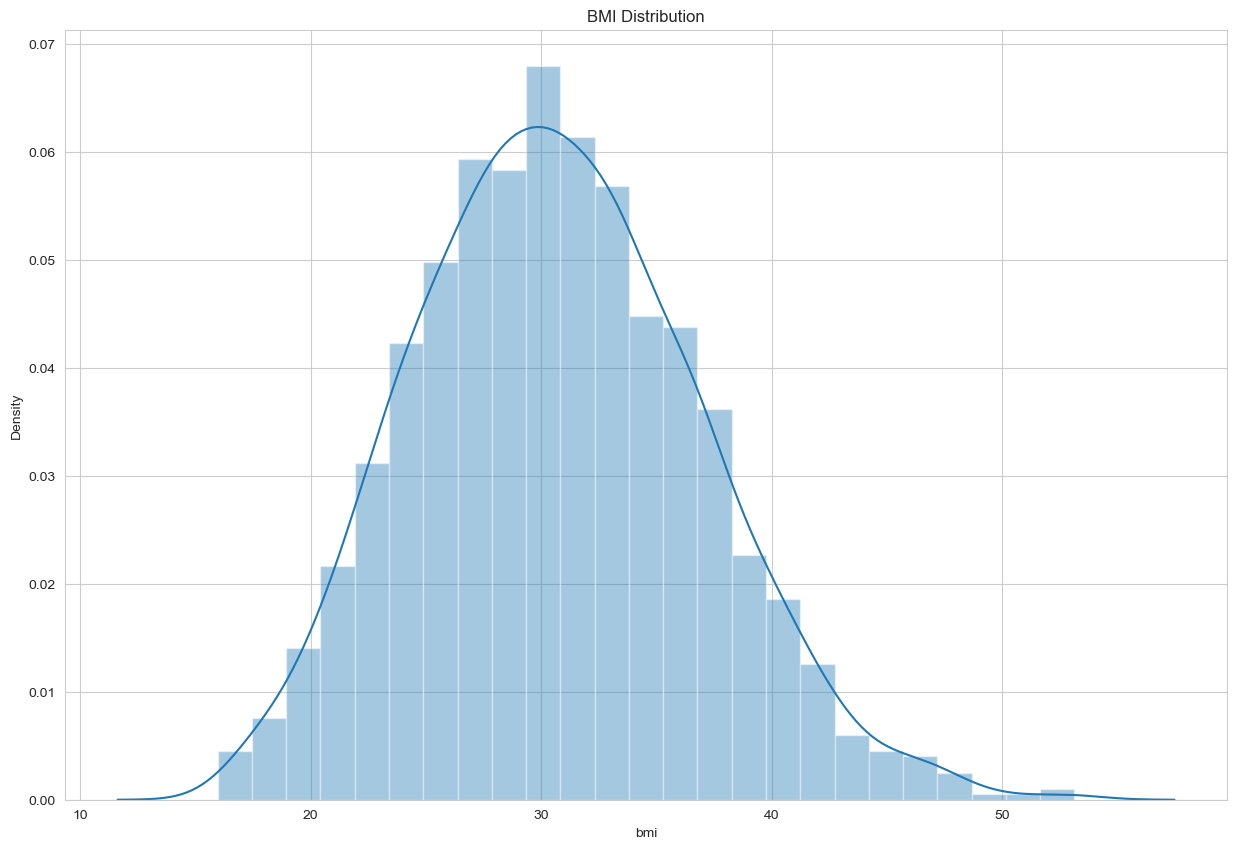

In [27]:
# Creating a distplot for bmi

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.bmi)
plt.title('BMI Distribution')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\3329017872.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.charges)


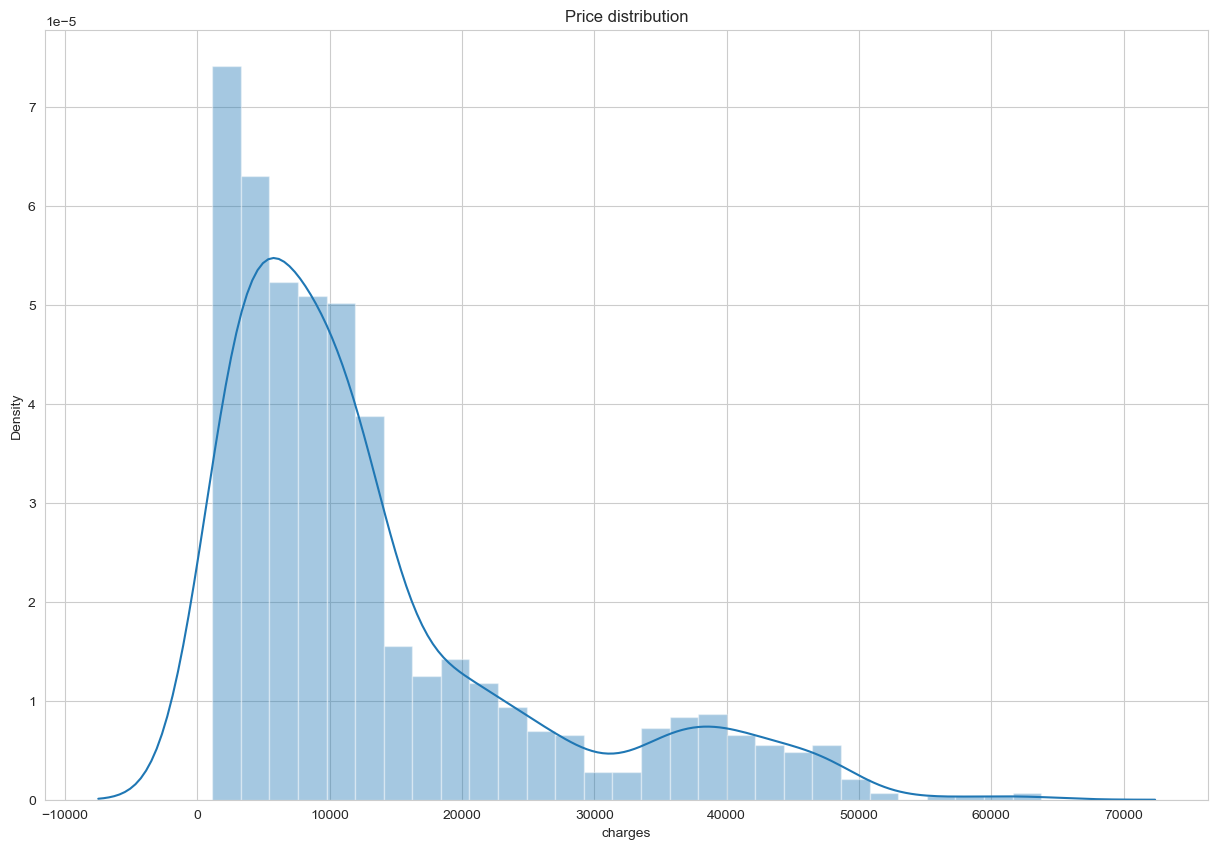

In [29]:
# Creating a distplot to see the price distribution

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.charges)
plt.title('Price distribution')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\260267639.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.children)


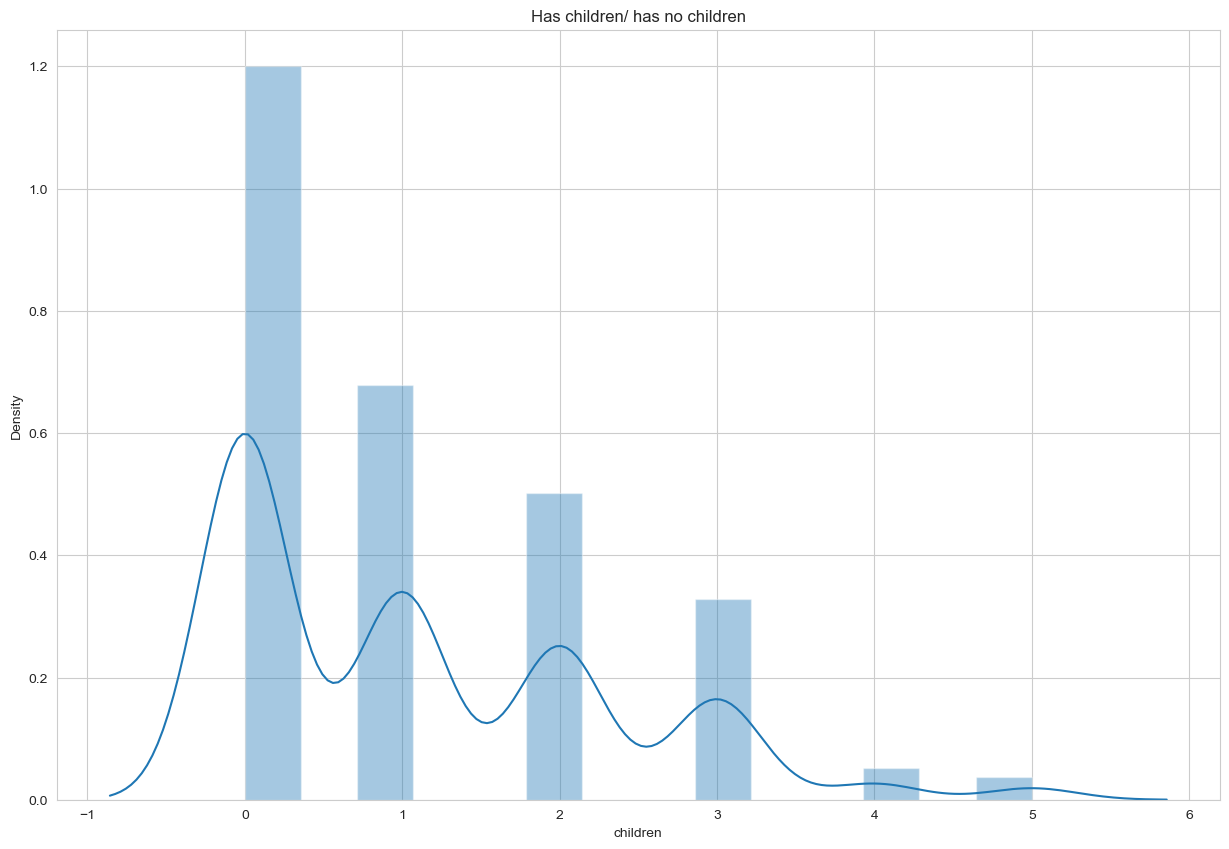

In [30]:
# Checking for the distribution of patients with children

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.children)
plt.title('Has children/ has no children')
plt.show()

In [32]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Categorical plots

In [33]:
# Making a function for count plots and scatter plots for Categorical features

def Categorical_plot(column): 
    
    plt.figure(figsize=(20, 5)) # make figure
    plt.subplot(1,2,1)
    pd.value_counts(data[column]).plot(kind='bar')
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.ylabel("Count\n", fontsize=15)    
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Count\n", fontsize = 15)
    
    plt.subplot(1,2,2)
    plt.scatter(data[column], data.age)
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(f"{str(column)} - Age\n", fontsize=15)
    plt.ylabel("Age\n", fontsize=15)
    
    plt.show()
    print()
    


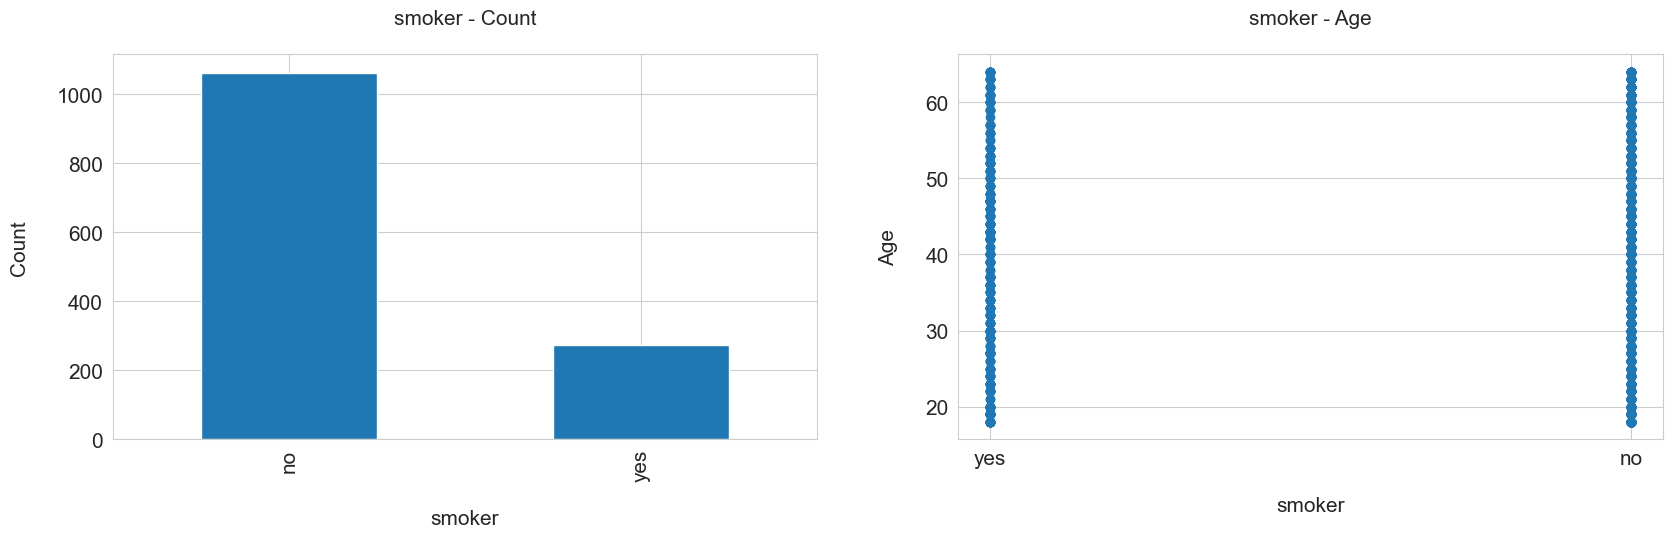

In [41]:
# Calling the created function for 'smoker'

Categorical_plot("smoker")

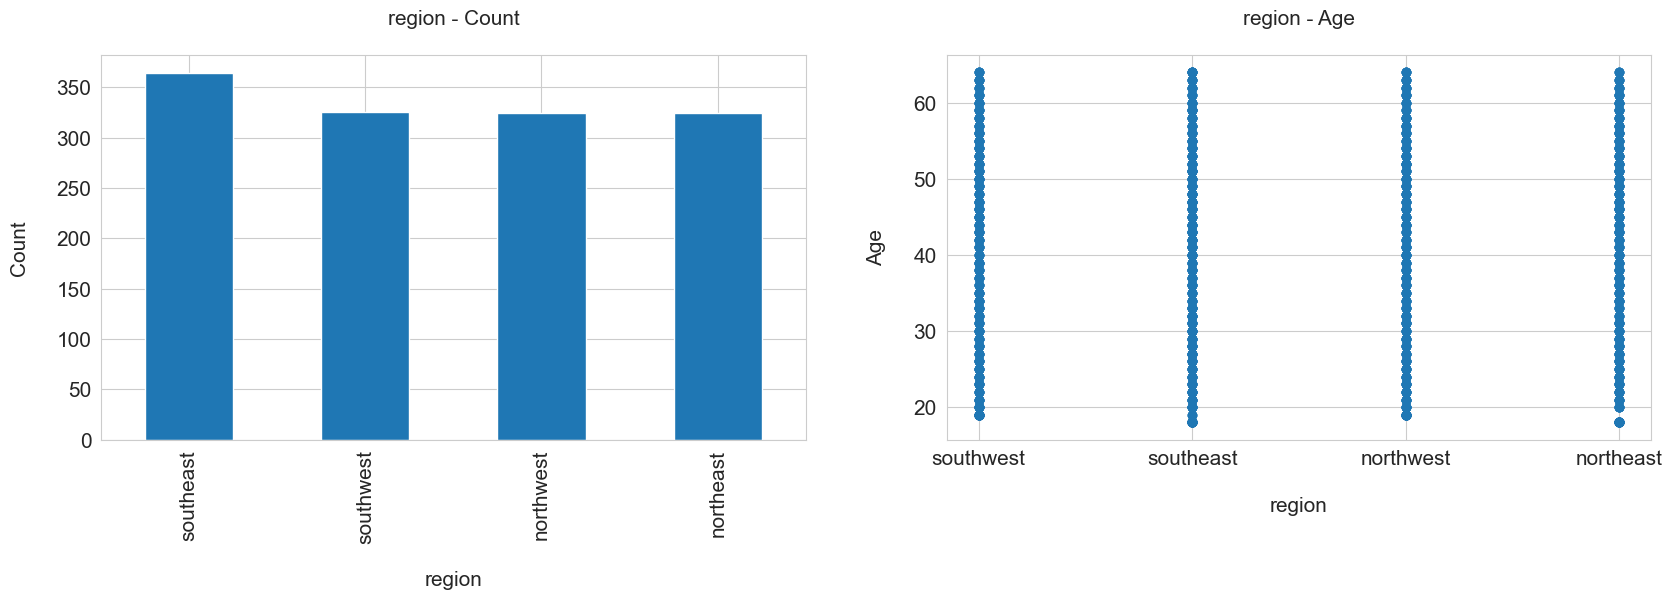

In [40]:
# Calling the created function for 'region'

Categorical_plot("region")

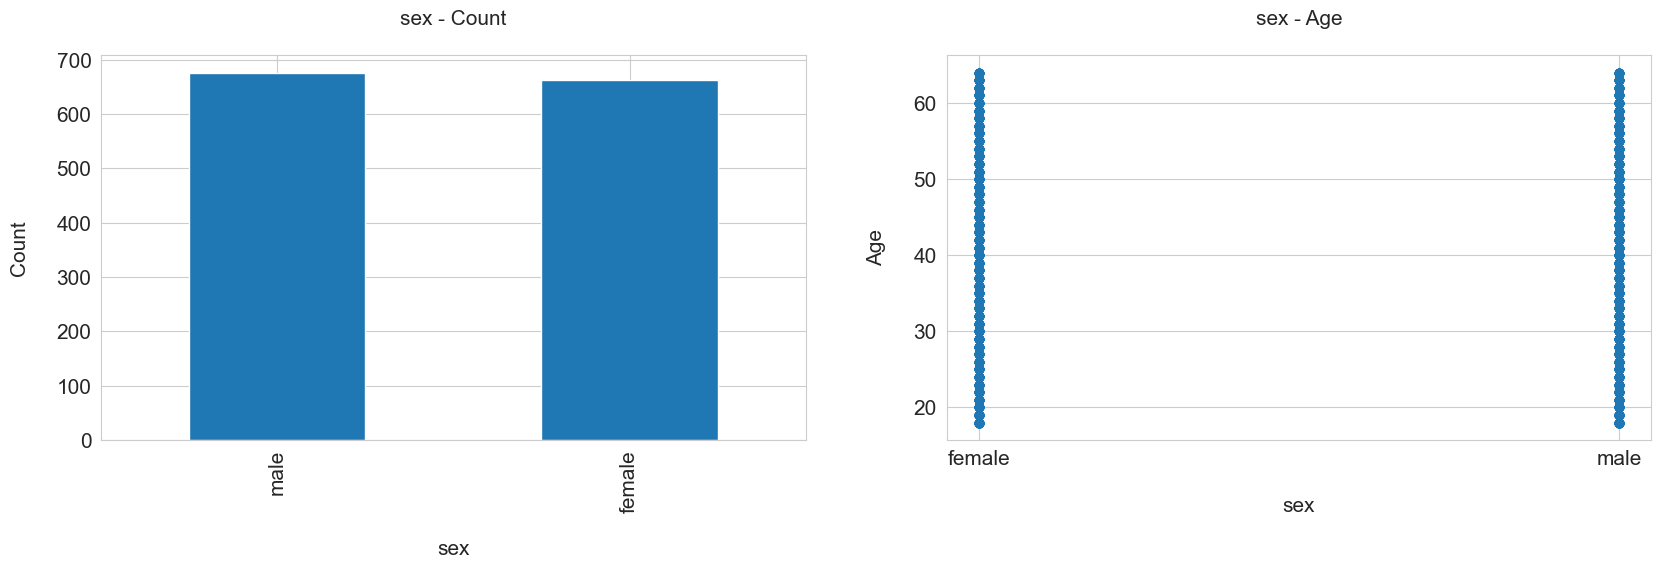

In [39]:
# Calling the created function for 'sex'

Categorical_plot("sex")

#### Numerical plots

In [1]:
# make function for box plots and scatter plots for Numerical features

def Numerical_plot(column):
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.boxplot(data[column])
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(f"\n{str(column)} Box Plot\n", fontsize=15)
    
    plt.subplot(1,2,2)
    plt.scatter(data[column], data.age)
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"\n{str(column)} - age\n", fontsize=15)
    plt.ylabel("Age\n", fontsize=15)
    plt.show()
    print()



#### Checking for outliers

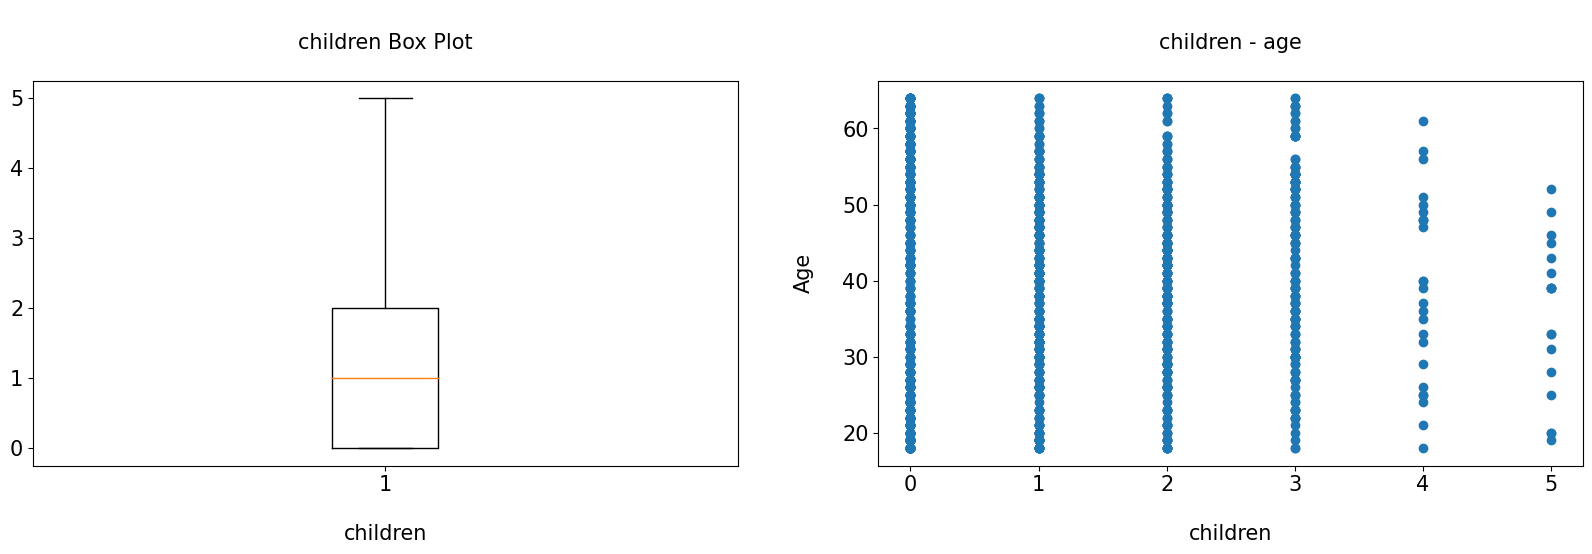

In [10]:
# # Call the numerical function for 'children'

Numerical_plot("children")

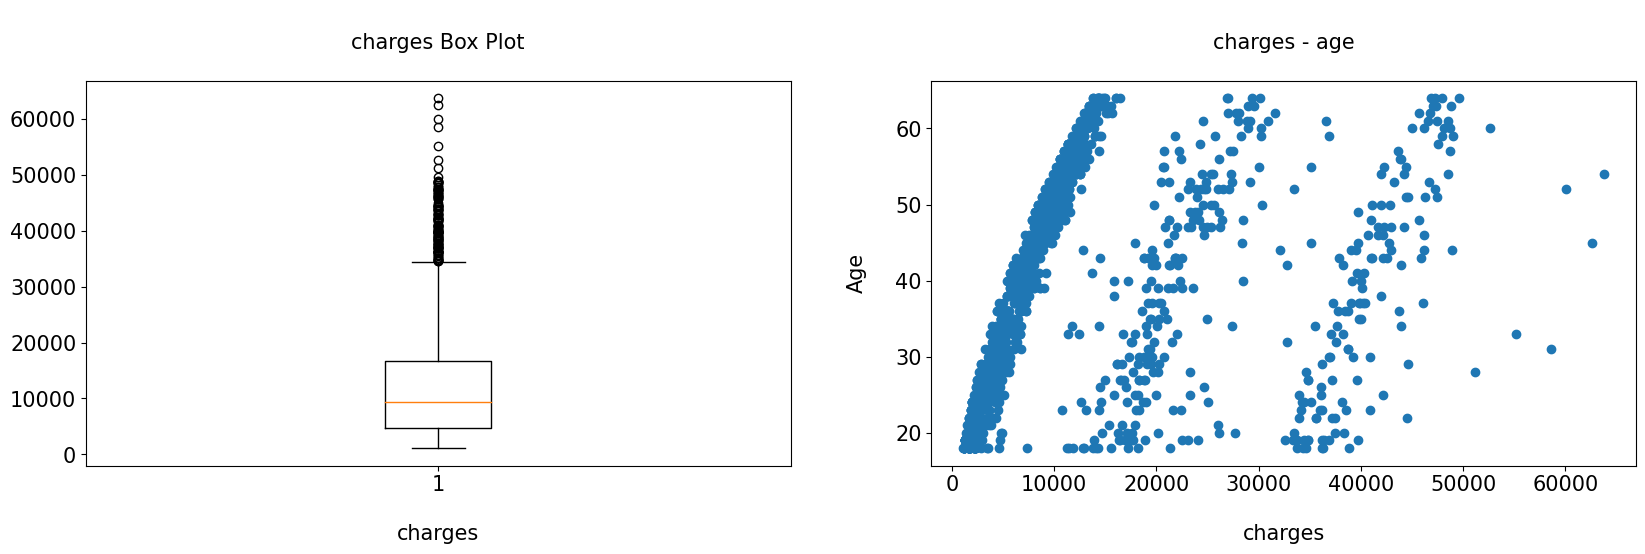

In [9]:
# Call the numerical function for 'charges'

Numerical_plot("charges")

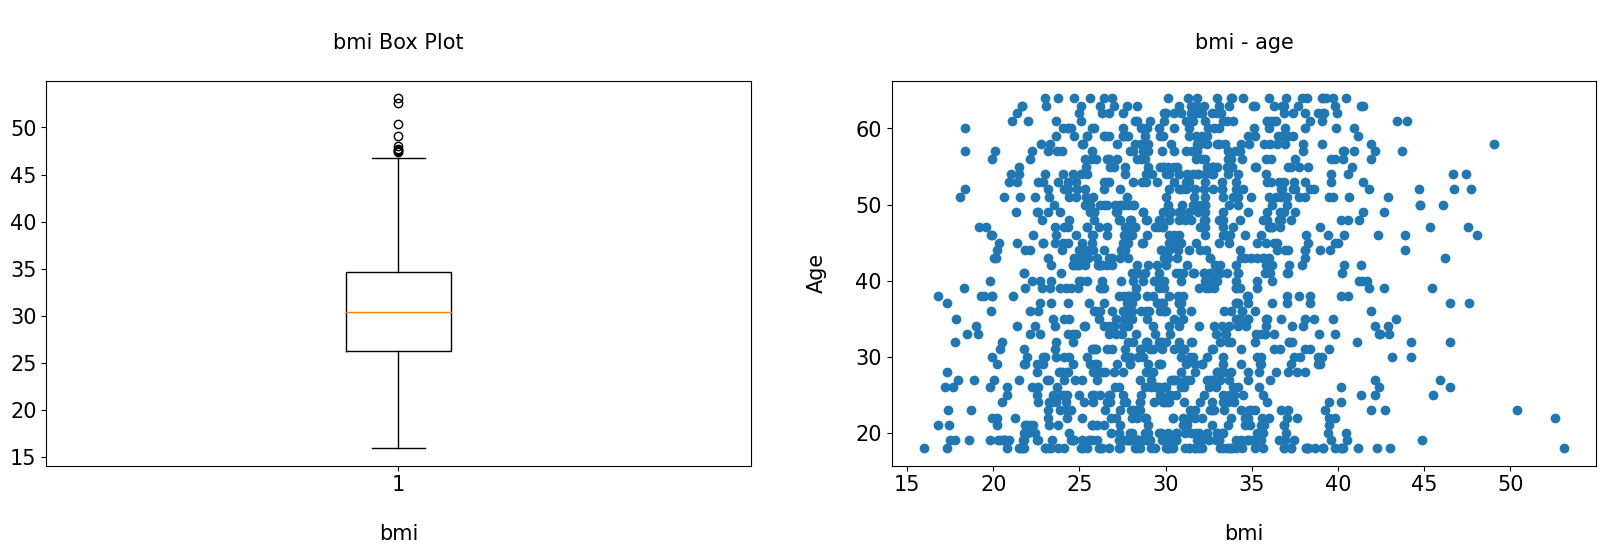

In [8]:
# Call the numerical function for 'bmi'

Numerical_plot("bmi")

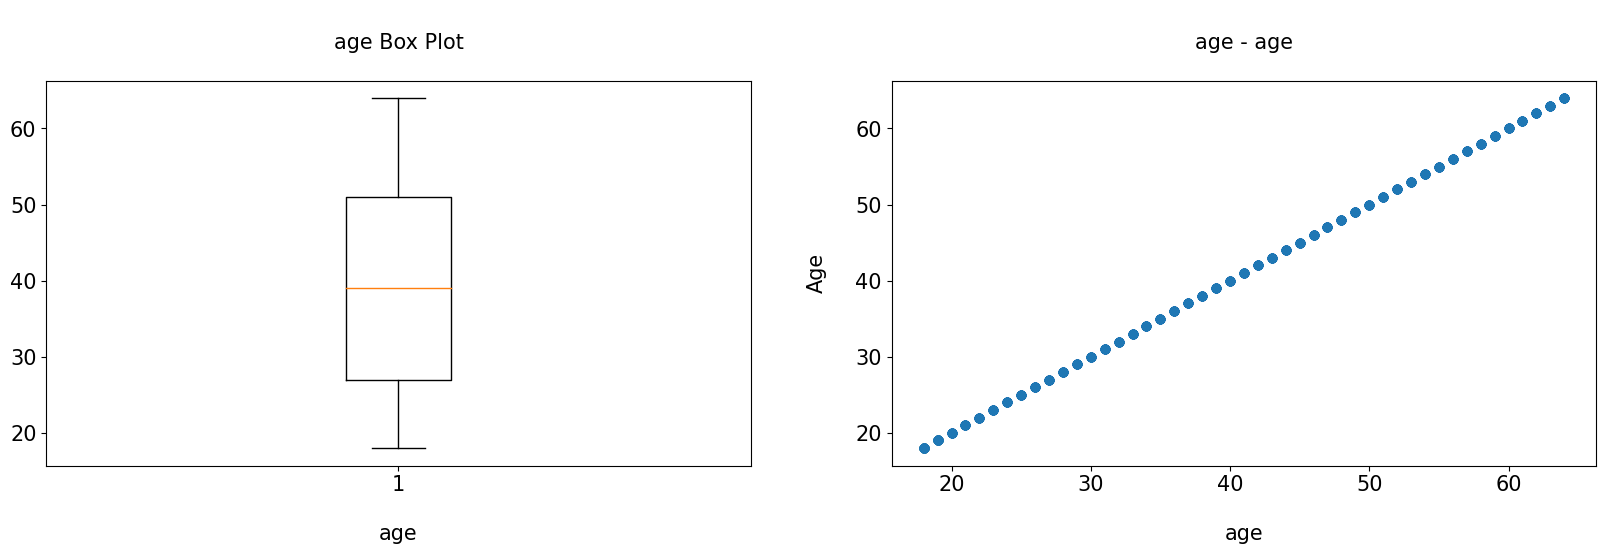

In [5]:
# Call the numerical function for 'age'

Numerical_plot("age")

### Bivariate Analysis

In [13]:
# Getting information about our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# creating a variable for all numerical columns in our data

numeric = data.select_dtypes(["int64", "float64"])
numeric[:5]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<Figure size 1500x1000 with 0 Axes>

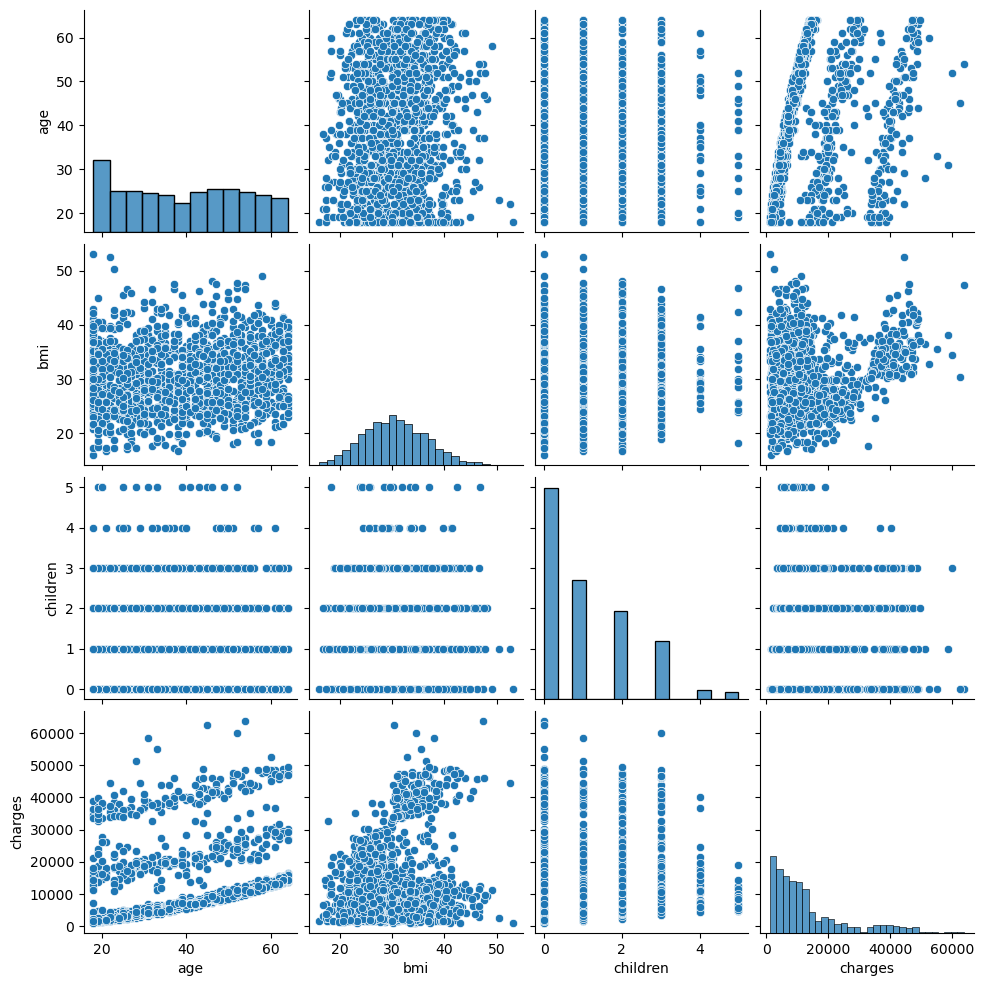

In [18]:
# Creating pairplots for the numerical columns

plt.figure(figsize=(15, 10))
sns.pairplot(numeric)
plt.show()

In [19]:
# Showing data correlation

numeric.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


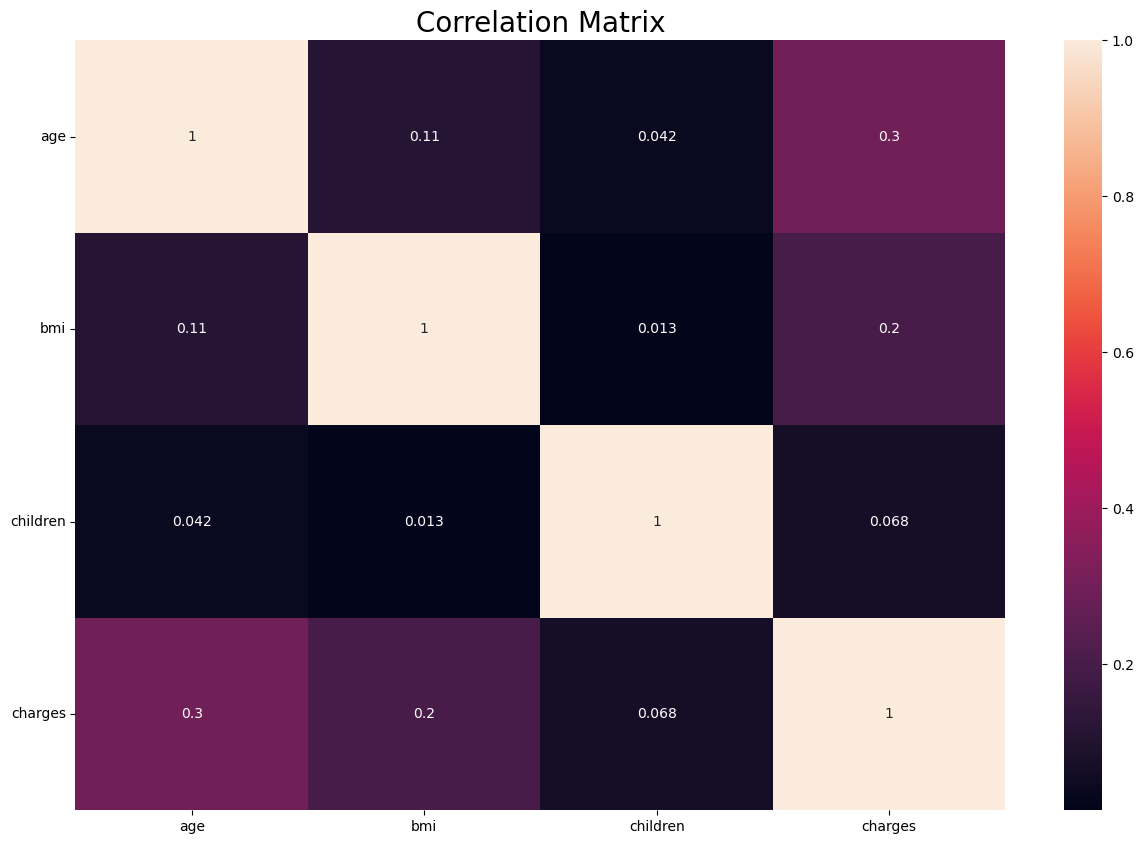

In [25]:
# Drawing the heat map for the correlation

plt.figure(figsize=(15, 10))
sns.heatmap(numeric.corr(), annot=True)
plt.title('Correlation Matrix', size = 20)
plt.yticks(rotation = 0)
plt.show()

#### Changing categorical features into numerical features

In [27]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [28]:
# Checking for unique values from categorical columns

print("Sex = ", data.sex.unique(), "\n")
print("Smoker = ", data.smoker.unique(), "\n")
print("Region  = ", data.region.unique(), "\n")


Sex =  ['female' 'male'] 

Smoker =  ['yes' 'no'] 

Region  =  ['southwest' 'southeast' 'northwest' 'northeast'] 



In [29]:
# Showing the value counts in 'region

data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [30]:
# showing the value counts in 'sex'

data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [31]:
# Showing the value counts in 'smoker'

data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [37]:
# Changing categorical features to numerical

data["region"].replace({'southeast':1, 'southwest':2, 'northeast':3, 'northwest':4}, inplace=True)
data["sex"].replace({'male':0, 'female':1}, inplace=True)
data["smoker"].replace({'no':0, 'yes':1}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [38]:
# Checking the feature changes made

print("Region = ", pd.unique(data["region"]), "\n")
print("Sex = ", pd.unique(data["sex"]), "\n")
print("Smoker = ", pd.unique(data["smoker"]), "\n")



Region =  [2 1 3 4] 

Sex =  [1 0] 

Smoker =  [1 0] 



In [40]:
data.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


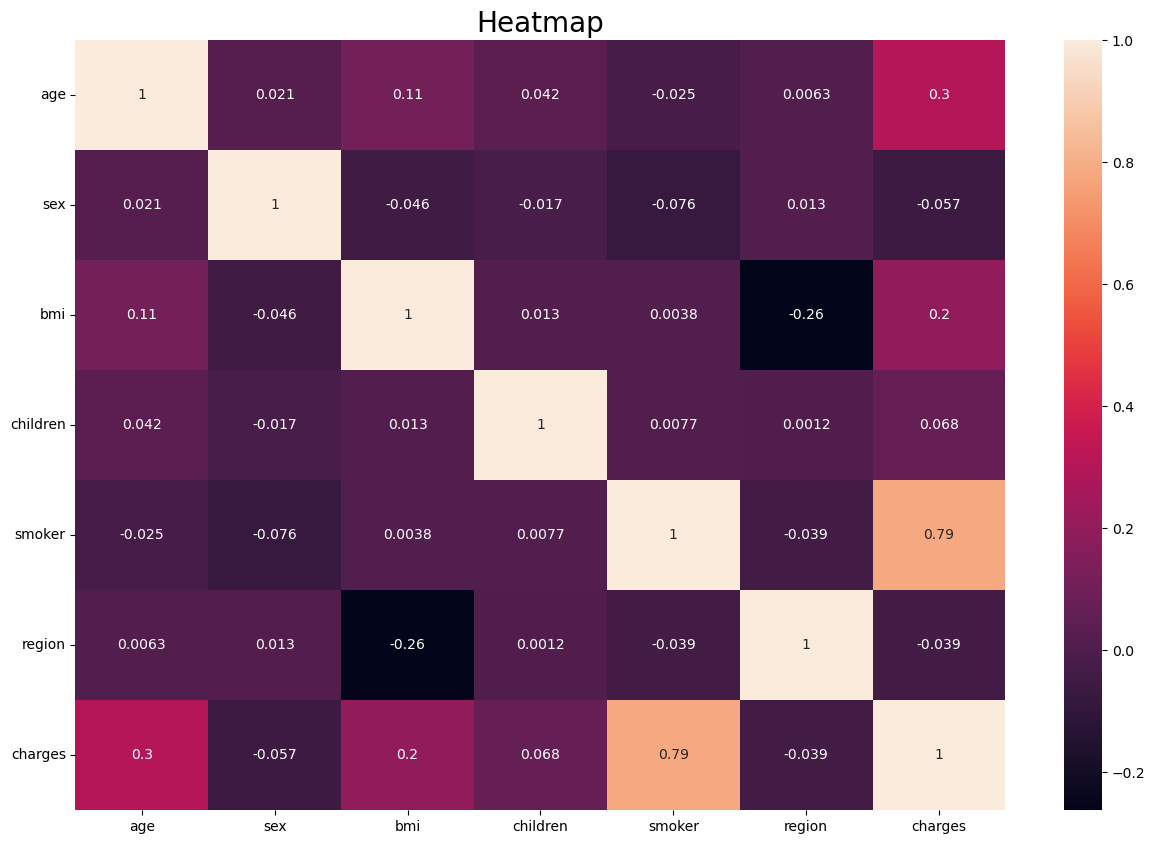

In [41]:
# Using the heatmap to show correlation for all features

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.yticks(rotation = 0)
plt.title("Heatmap", size = 20)
plt.show()